# Getting Started
We'll first import some packages and get our initial diagrams from the example image

## Packages
The code below imports the ```persistencecurve``` package (the subject of this tutorial), ```matplotlib``` for plotting and visualization, ```opencv``` for image handling, and ```gudhi``` for persistence diagram computations. Finally we define the function `get_PD`, which streamlines gudhi's process to produce persistence diagrams for an image.

In [25]:
import persistencecurves as pc
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image
import gudhi
#function for gudhi's process
def get_PD(image,inf_replace = float("inf")):
    reshaped = np.reshape(image, [image.shape[0]*image.shape[1]], order = 'F')#reshape image, order="F" is necessary and should not be changed
    Complex = gudhi.CubicalComplex(dimensions=image.shape, top_dimensional_cells=reshaped)    #initialize Cubical complex
    Complex.persistence()    #compute persistence
    #extract diagrams and make replacements
    Dgm0=Complex.persistence_intervals_in_dimension(0)
    Dgm0[Dgm0==float("inf")] = inf_replace
    Dgm1=Complex.persistence_intervals_in_dimension(1)
    return Dgm0,Dgm1

## The example image
The image we're using is one from the texture database, `UIUCTex`. It is a grayscale image of bricks. Specifically, it is image `T15_34` in that database.

We will use opencv to load the image and matplotlib to view it.

(480, 640)


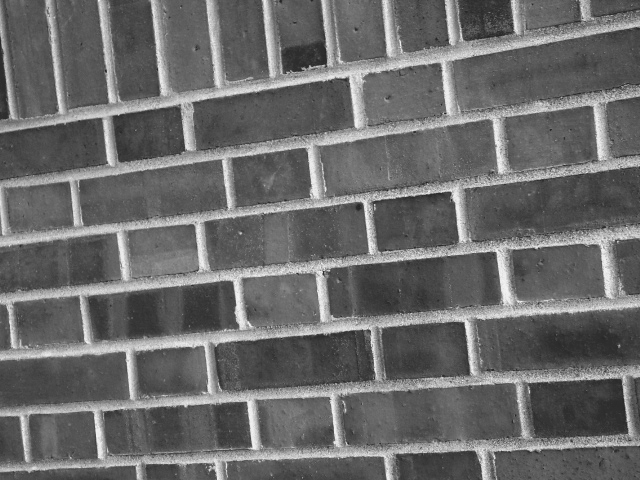

In [26]:
image = Image.open("Bricks.jpg")
arr = np.array(image)
print(arr.shape)
image